In [14]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from my_utils import load_data
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Model, load_model
from keras.layers import Input, Dense, Dropout
from keras.callbacks import ModelCheckpoint, TensorBoard
from keras import regularizers

In [3]:
X, session_df, requests_df = load_data(csv_path='output.log', req_thres=5, normalize_feat=True)

LOADING THE DATASET...


Skipping line 601729: Expected 7 fields in line 601729, saw 23. Error could possibly be due to quotes being ignored when a multi-char delimiter is used.


DATASET HAS BEEN LOADED SUCESSFULLY!


In [4]:
X.head(10)

requests_count  \
ip              user_agent                                                           
1.81.122.235    Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...       -0.095735   
10.92.2.8       Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...       -0.031429   
100.92.35.41    Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...       -0.080424   
102.0.232.185   Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...       -0.068175   
102.0.232.220   Mozilla/5.0 (Linux; Android 11; SM-A505F) Apple...       -0.074299   
102.0.68.163    Mozilla/5.0 (Linux; Android 10; STK-LX1) AppleW...       -0.083486   
102.105.101.172 Mozilla/5.0 (Linux; Android 8.1.0; SAMSUNG SM-G...       -0.000806   
                Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) Ap...        0.094122   
102.105.103.140 Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3)...       -0.055926   
102.105.139.132 Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...        5.045710   

                                                                    path_length_std  \
ip              user_agent                                                            
1.81.122.235    Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...         0.000000   
10.92.2.8       Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...         0.507875   
100.92.35.41    Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...         0.834847   
102.0.232.185   Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...         0.516398   
102.0.232.220   Mozilla/5.0 (Linux; Android 11; SM-A505F) Apple...         0.267261   
102.0.68.163    Mozilla/5.0 (Linux; Android 10; STK-LX1) AppleW...         0.301511   
102.105.101.172 Mozilla/5.0 (Linux; Android 8.1.0; SAMSUNG SM-G...         0.603451   
                Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) Ap...         0.671233   
102.105.103.140 Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3)...         0.307794   
102.105.139.132 Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...         0.625527   

                                                                    4xx_percentage(%)  \
ip              user_agent                                                              
1.81.122.235    Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...          -0.102574   
10.92.2.8       Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...          -0.102574   
100.92.35.41    Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...          -0.102574   
102.0.232.185   Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...          -0.102574   
102.0.232.220   Mozilla/5.0 (Linux; Android 11; SM-A505F) Apple...          -0.102574   
102.0.68.163    Mozilla/5.0 (Linux; Android 10; STK-LX1) AppleW...          -0.102574   
102.105.101.172 Mozilla/5.0 (Linux; Android 8.1.0; SAMSUNG SM-G...          -0.102574   
                Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) Ap...          -0.102574   
102.105.103.140 Mozilla/5.0 (Macintosh; Intel Mac OS X 10_14_3)...          -0.102574   
102.105.139.132 Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...          -0.093590   

                                                                    3xx_percentage(%)  \
ip              user_agent                                                              
1.81.122.235    Mozilla/5.0 (iPhone; CPU iPhone OS 14_6 like Ma...          -0.718296   
10.92.2.8       Mozilla/5.0 (Linux; Android 6.0.1; SAMSUNG SM-A...          -0.718296   
100.92.35.41    Mozilla/5.0 (Linux; Android 9; SM-A205F) AppleW...          -0.718296   
102.0.232.185   Mozilla/5.0 (Windows NT 10.0; Win64; x64) Apple...          -0.718296   
102.0.232.220   Mozilla/5.0 (Linux; Android 11; SM-A505F) Apple...          -0.718296   
102.0.68.163    Mozilla/5.0 (Linux; Android 10; STK-LX1) AppleW...           1.721873   
102.105.101.172 Mozilla/5.0 (Linux; Android 8.1.0; SAMSUNG SM-G...          -0.647660   
                Mozilla/5.0 (Linux; Android 8.1.0; SM-G610F) Ap...          -0.368185   
102.105.103.140 Mozilla/5.0 (Ma

In [107]:
X['is_bot'] = X['is_bot'].astype(int)
X['is_pc'] = X['is_pc'].astype(int)

to_model_cols = X.columns[:14]

X_train, X_test = train_test_split(X[to_model_cols], test_size=0.2, random_state=42)

print('X_train shape: {}'.format(X_train.shape))
print('X_test shape: {}'.format(X_test.shape))

X_train shape: (25232, 14)
X_test shape: (6309, 14)


In [108]:
X_train.columns

Index(['requests_count', 'path_length_std', '4xx_percentage(%)',
       '3xx_percentage(%)', 'HEAD_count(%)', 'image_count(%)',
       'total_response_length', 'mean_response_length', 'total_response_time',
       'mean_response_time', 'avg_path_count_norm', 'is_bot', 'is_pc',
       'avg_time_diff'],
      dtype='object')

# Auto encoder model

In [ ]:
X_test.drop(columns=['mse'], axis=1, inplace=True)
X_train.drop(columns=['mse'], axis=1, inplace=True)

In [178]:
input_dim = X_train.shape[1] # the # features
encoding_dim = input_dim # first layer
hidden_dim = int(encoding_dim / 2) #hidden layer


# model architecture
input_layer = Input(shape=(input_dim))
encoder = Dense(encoding_dim, activation="relu")(input_layer)
encoder = Dense(hidden_dim, activation="relu")(encoder)
decoder = Dense(encoding_dim, activation='relu')(encoder)
decoder = Dense(input_dim, activation='relu')(decoder)
autoencoder = Model(inputs=input_layer, outputs=decoder)

# Compile the model
autoencoder.compile(optimizer='adam',
              loss='mean_squared_error',
              metrics=['acc'])

autoencoder.summary()

Model: "model_22"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_23 (InputLayer)        [(None, 14)]              0         
_________________________________________________________________
dense_88 (Dense)             (None, 14)                210       
_________________________________________________________________
dense_89 (Dense)             (None, 7)                 105       
_________________________________________________________________
dense_90 (Dense)             (None, 14)                112       
_________________________________________________________________
dense_91 (Dense)             (None, 14)                210       
Total params: 637
Trainable params: 637
Non-trainable params: 0
_________________________________________________________________


In [179]:
nb_epoch = 25
batch_size = 128

checkpoint_filepath = 'checkpoints/'

model_checkpoint_callback = ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='val_acc',
    mode='max',
    save_best_only=True)

history = autoencoder.fit(X_train, X_train,
                    epochs=nb_epoch,
                    batch_size=batch_size,
                    validation_data=(X_test, X_test),
                    verbose=1, callbacks=[model_checkpoint_callback])

Epoch 1/25
198/198 [==============================] - 1s 2ms/step - loss: 0.5750 - acc: 0.4452 - val_loss: 0.9692 - val_acc: 0.7136
Epoch 2/25
198/198 [==============================] - 0s 831us/step - loss: 0.4464 - acc: 0.7435 - val_loss: 0.8829 - val_acc: 0.8326
Epoch 3/25
198/198 [==============================] - 0s 945us/step - loss: 0.4589 - acc: 0.8337 - val_loss: 0.8613 - val_acc: 0.8551
Epoch 4/25
198/198 [==============================] - 0s 946us/step - loss: 0.5226 - acc: 0.8521 - val_loss: 0.7996 - val_acc: 0.8569
Epoch 5/25
198/198 [==============================] - 0s 949us/step - loss: 0.5791 - acc: 0.8522 - val_loss: 0.7267 - val_acc: 0.8591
Epoch 6/25
198/198 [==============================] - 0s 842us/step - loss: 0.3429 - acc: 0.8545 - val_loss: 0.7289 - val_acc: 0.8634
Epoch 7/25
198/198 [==============================] - 0s 846us/step - loss: 0.3571 - acc: 0.8547 - val_loss: 0.7326 - val_acc: 0.8621
Epoch 8/25
198/198 [==============================] - 0s 849us/s

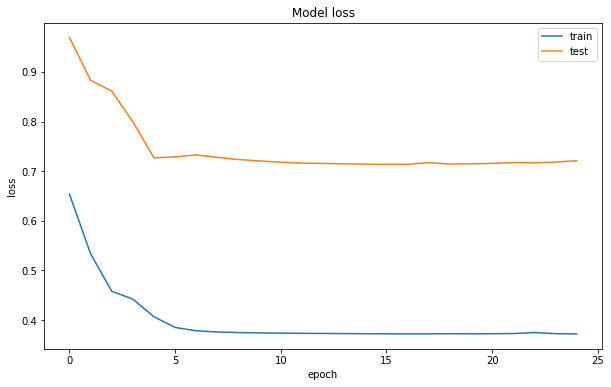

In [180]:
fig = plt.figure(figsize=(10,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [156]:
X_test.drop(columns=['mse'], axis=1, inplace=True)
X_train.drop(columns=['mse'], axis=1, inplace=True)

In [157]:
# load the best weights
autoencoder.load_weights(checkpoint_filepath)

train_preds = autoencoder.predict(X_train)
test_preds = autoencoder.predict(X_test)

#get the error term
mse_train = np.mean(np.power(X_train.to_numpy() - train_preds, 2), axis=1)
mse_test = np.mean(np.power(X_test.to_numpy() - test_preds, 2), axis=1)

ValueError: in user code:

    /Users/mohammad/venv/lib/python3.9/site-packages/keras/engine/training.py:1544 predict_function  *
        return step_function(self, iterator)
    /Users/mohammad/venv/lib/python3.9/site-packages/keras/engine/training.py:1527 run_step  *
        outputs = model.predict_step(data)
    /Users/mohammad/venv/lib/python3.9/site-packages/keras/engine/training.py:1500 predict_step  *
        return self(x, training=False)
    /Users/mohammad/venv/lib/python3.9/site-packages/keras/engine/base_layer.py:989 __call__  *
        input_spec.assert_input_compatibility(self.input_spec, inputs, self.name)
    /Users/mohammad/venv/lib/python3.9/site-packages/keras/engine/input_spec.py:264 assert_input_compatibility  *
        raise ValueError('Input ' + str(input_index) +

    ValueError: Input 0 is incompatible with layer model_15: expected shape=(None, 15), found shape=(None, 14)


In [116]:
X_train['mse'] = mse_train
X_test['mse'] = mse_test

In [138]:
mse_threshold = np.quantile(X_train['mse'], 0.98)
print('mse threshold is {}'.format(mse_threshold))


train_outliers = session_df.loc[X_train[X_train['mse'] > mse_threshold].sort_values(['mse'], ascending=False).index]
train_inliers = session_df.loc[X_train[X_train['mse'] < mse_threshold].sort_values(['mse'], ascending=True).index]

print('train outliers shape: {}'.format(train_outliers.shape))
print('train inliers shape: {}'.format(train_inliers.shape))

train_outliers.reset_index(inplace=True)
train_inliers.reset_index(inplace=True)

mse threshold is 0.509452973684587
train outliers shape: (505, 16)
train inliers shape: (24727, 16)


In [143]:
ip = train_outliers.iloc[5].ip
ua = train_outliers.iloc[5].user_agent

requests_df[(requests_df['ip'] == ip) & (requests_df['user_agent'] == ua)].sort_values('time_stamp', ascending=True).head(20)

,ip,time,method,status_code,path,response_length,user_agent,response_time,path_count_normalized,path_length,time_stamp
50,20.116.215.189,2021-05-12 05:06:02+04:30,Get,200,templates/service.html,1201,Go-http-client/2.0,0.0,1.435251,2,1620779762
405,20.116.215.189,2021-05-12 05:06:14+04:30,Head,200,877499224,0,Go-http-client/2.0,32.0,2.670010,1,1620779774
506,20.116.215.189,2021-05-12 05:06:17+04:30,Get,200,templates/service.html,1201,Go-http-client/2.0,4.0,1.435251,2,1620779777
751,20.116.215.189,2021-05-12 05:06:29+04:30,Head,200,877499224,0,Go-http-client/2.0,24.0,2.670010,1,1620779789
780,20.116.215.189,2021-05-12 05:06:32+04:30,Head,200,877499224,0,Go-http-client/2.0,28.0,2.670010,1,1620779792
799,20.116.215.189,2021-05-12 05:06:33+04:30,Get,200,templates/service.html,1201,Go-http-client/2.0,0.0,1.435251,2,1620779793
1029,20.116.215.189,2021-05-12 05:06:47+04:30,Head,200,877499224,0,Go-http-client/2.0,16.0,2.670010,1,1620779807
1040,20.116.215.189,2021-05-12 05:06:48+04:30,Get,200,templates/service.html,1201,Go-http-client/2.0,8.0,1.435251,2,1620779808
1385,20.116.215.189,2021-05-12 05:07:00+04:30,Get,307,,0,Go-http-client/2.0,4.0,0.481101,1,1620779820
1390,20.116.215.189,2021-05-12 05:07:00+04:30,Get,200,877499224,63379,Go-http-client/2.0,20.0,2.670010,1,1620779820
